Import dan Setup

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import cv2

Load Dataset

In [5]:
graded_csv = r"E:\DragonEye\dataset\graded_features.csv"
df = pd.read_csv(graded_csv)
df.head()

,filename,area,width,height,weight_est,area_norm,weight_norm,grade_score,grade_label,label_asli
0,MT1_001.jpg,0.193916,100,240,31.77125,0.584758,0.584758,50.000000,B,A
1,MT1_002.jpg,0.201515,108,189,33.01625,0.616935,0.616935,53.104362,B,A
2,MT1_003.jpg,0.197990,105,213,32.43875,0.602009,0.602009,50.356137,B,A
3,MT1_004.jpg,0.209953,111,209,34.39875,0.652667,0.652667,61.355547,B,A
4,MT1_005.jpg,0.196228,117,198,32.15000,0.594547,0.594547,50.000000,B,A


Evaluasi Akurasi & Confusion Matrix

===== EVALUASI HASIL GRADING =====
Akurasi : 0.7567901234567901

Confusion Matrix:
 [[152 118   0]
 [ 16 213  41]
 [  0  22 248]]

Classification Report:
               precision    recall  f1-score   support

           A       0.90      0.56      0.69       270
           B       0.60      0.79      0.68       270
           C       0.86      0.92      0.89       270

    accuracy                           0.76       810
   macro avg       0.79      0.76      0.76       810
weighted avg       0.79      0.76      0.76       810



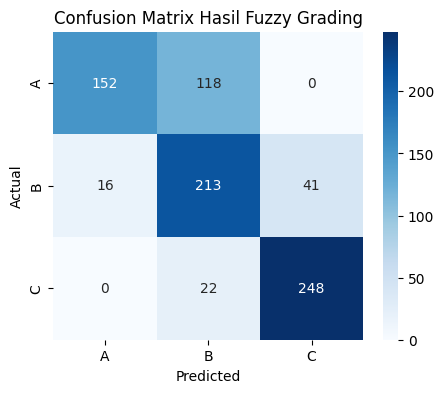

In [6]:
y_true = df['label_asli']
y_pred = df['grade_label']

print("===== EVALUASI HASIL GRADING =====")
print("Akurasi :", accuracy_score(y_true, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))
print("\nClassification Report:\n", classification_report(y_true, y_pred))

cm = confusion_matrix(y_true, y_pred, labels=['A', 'B', 'C'])
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['A', 'B', 'C'], yticklabels=['A', 'B', 'C'])
plt.title("Confusion Matrix Hasil Fuzzy Grading")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Distribusi Grade

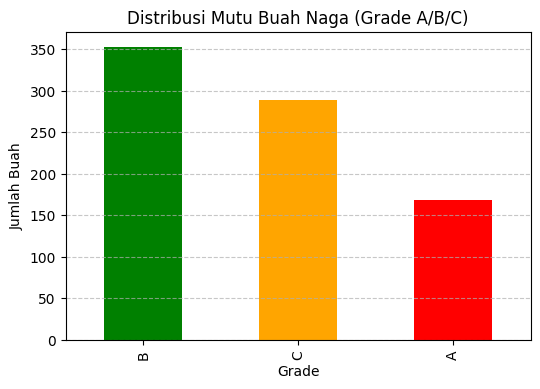

In [7]:
plt.figure(figsize=(6, 4))
df['grade_label'].value_counts().plot(kind='bar', color=['green', 'orange', 'red'])
plt.title("Distribusi Mutu Buah Naga (Grade A/B/C)")
plt.xlabel("Grade")
plt.ylabel("Jumlah Buah")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Visualisasi Sebaran Fitur

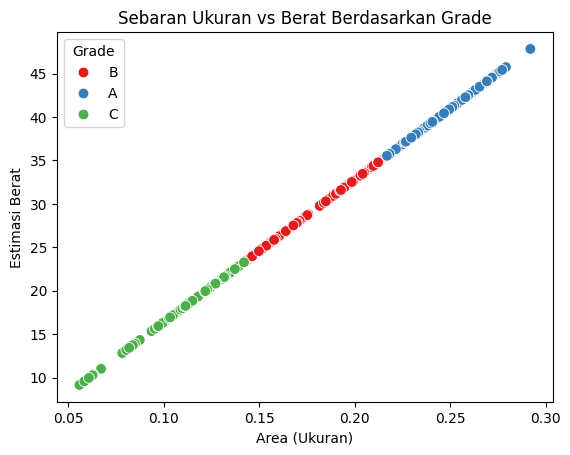

In [11]:
sns.scatterplot(data=df, x='area', y='weight_est', hue='grade_label', palette='Set1', s=60)
plt.title("Sebaran Ukuran vs Berat Berdasarkan Grade")
plt.xlabel("Area (Ukuran)")
plt.ylabel("Estimasi Berat")
plt.legend(title="Grade")
plt.show()

Tampilkan Beberapa Gambar Contoh

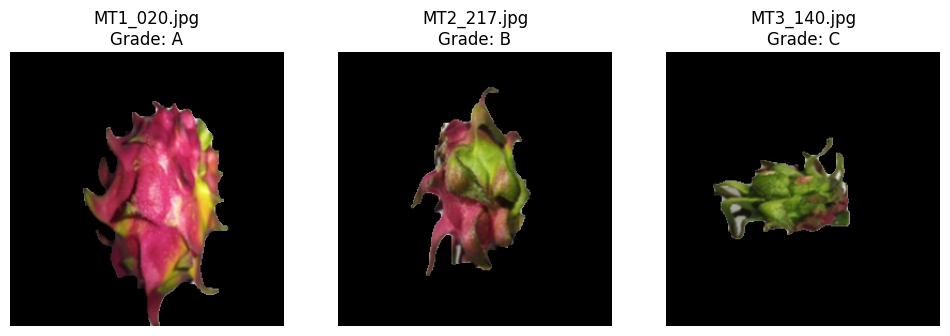

In [15]:
SEGMENTED_DIR = r"E:\DragonEye\dataset\segmented"

# Filter DataFrame untuk masing-masing grade dan ambil satu sampel untuk tiap grade
samples_A = df[df['grade_label'] == 'A'].sample(n=1)
samples_B = df[df['grade_label'] == 'B'].sample(n=1)
samples_C = df[df['grade_label'] == 'C'].sample(n=1)

# Gabungkan sampel dari ketiga grade
samples = pd.concat([samples_A, samples_B, samples_C])

# Plotting gambar
plt.figure(figsize=(12, 4))
for i, (_, row) in enumerate(samples.iterrows()):
    img_path = os.path.join(SEGMENTED_DIR, row['filename'])
    img = cv2.imread(img_path)
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Ubah BGR ke RGB untuk tampilan yang benar
        plt.subplot(1, 3, i + 1)  # Menyusun 3 gambar dalam 1 baris
        plt.imshow(img)
        plt.title(f"{row['filename']}\nGrade: {row['grade_label']}")
        plt.axis('off')
plt.show()